# LOAN STATUS PREDICTION:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

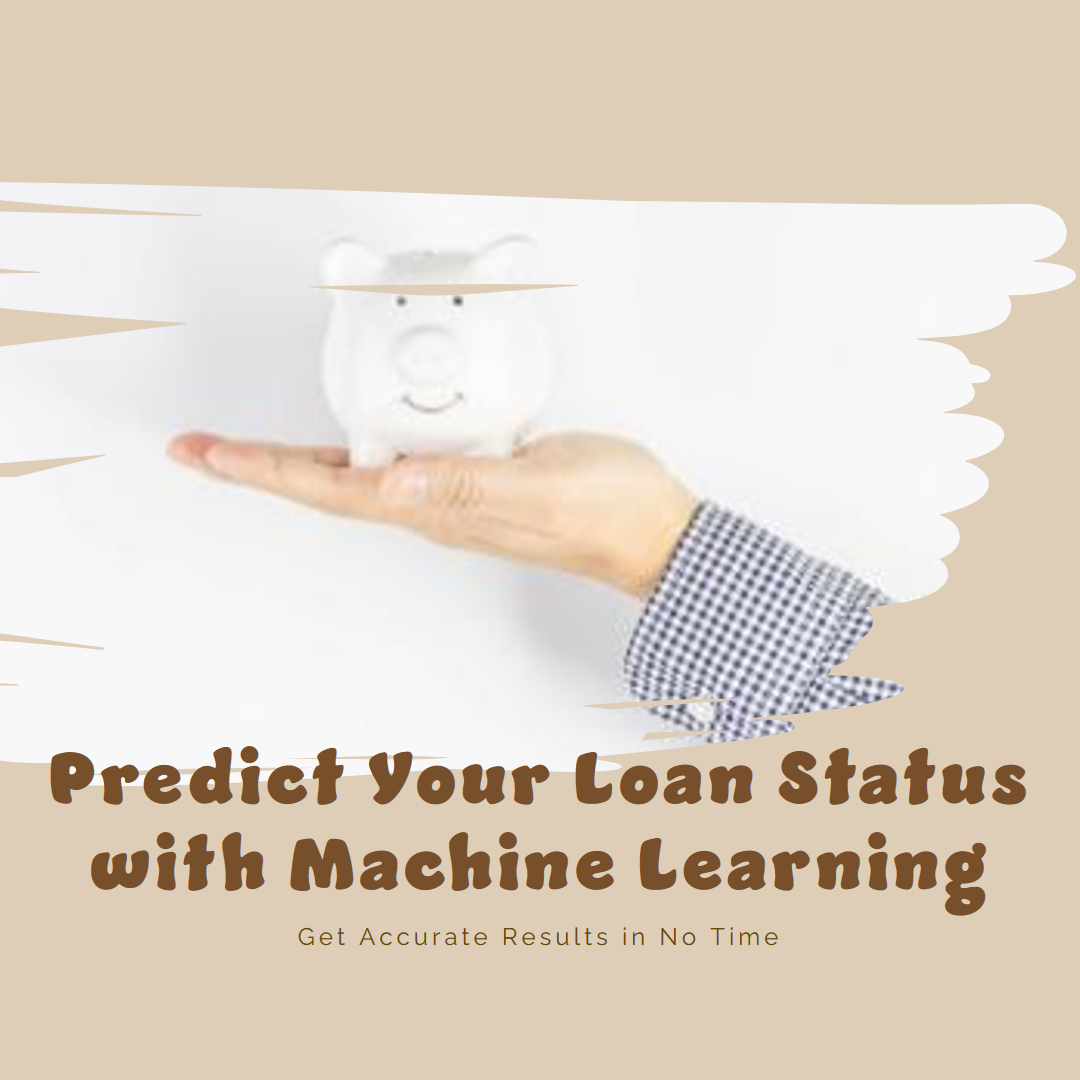

In [160]:
from IPython.display import Image
image_path = 'WelcomePoster.png'
Image(filename=image_path)


In [112]:
df= pd.read_csv("train.csv")

In [113]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
df.drop(columns="Loan_ID",axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
print(f"The shape of the dataframe is: {df.shape}")

The shape of the dataframe is: (614, 12)


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [117]:
#statistical information
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [118]:
# #Example

# import pandas as pd

# # Sample DataFrame
# data = {'A': [1, 2, 3, 4, 5],
#         'B': [10, 20, 30, 40, 50],
#         'C': [100, 200, 300, 400, 500]}

# df = pd.DataFrame(data)

# # Display the original DataFrame
# print("Original DataFrame:")
# print(df)

# # Use describe() to get summary statistics
# summary_stats = df.describe()

# # Display the summary statistics
# print("\nSummary Statistics:")
# print(summary_stats)


In [119]:
#Show duplicated rows
df.duplicated().sum()

0

In [120]:
#Show NaN Values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

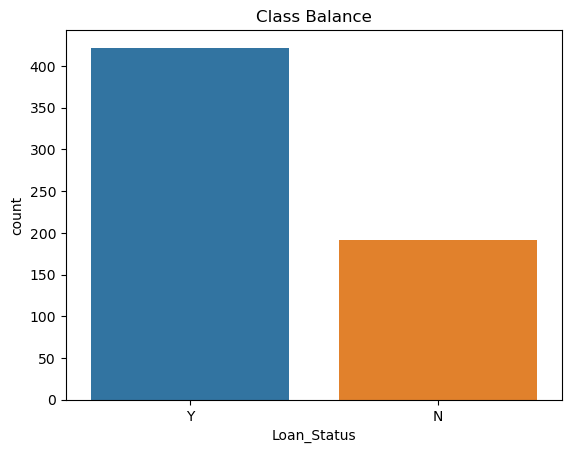

In [121]:
sns.countplot(x=df['Loan_Status'])
plt.title('Class Balance');
# print(df.columns)

In [122]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [123]:
df['Dependents'] = df['Dependents'].replace({'3+': 4})
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [124]:
filtered_df = df[df['Dependents'] == 4]
print(filtered_df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
7      Male     Yes          4      Graduate            No             3036   
34     Male      No          4      Graduate            No            12500   
61     Male     Yes          4      Graduate            No             3029   
68     Male     Yes          4  Not Graduate           Yes             7100   
73     Male     Yes          4  Not Graduate            No             4755   
74     Male     Yes          4      Graduate           Yes             5266   
78     Male     Yes          4      Graduate            No             3167   
79     Male     Yes          4  Not Graduate           Yes             3333   
109    Male     Yes          4  Not Graduate            No             2071   
126     NaN     Yes          4      Graduate            No            23803   
135    Male     Yes          4      Graduate            No             4000   
155    Male     Yes          4      Graduate        

In [125]:
rows_count=len(filtered_df)
#Let's print the total number of rows in filtered_df
print(f"Total number of rows in filtere_df is: {rows_count}")

Total number of rows in filtere_df is: 51


In [126]:
df["Dependents"].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

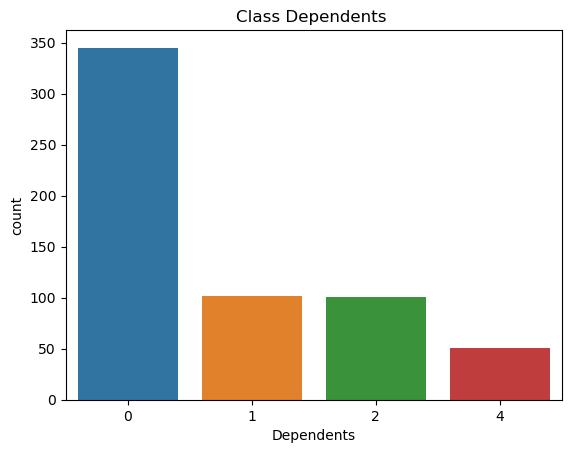

In [127]:
sns.countplot(x=df["Dependents"])
plt.title('Class Dependents ');

Text(0.5, 1.0, 'Dependents and Load Status')

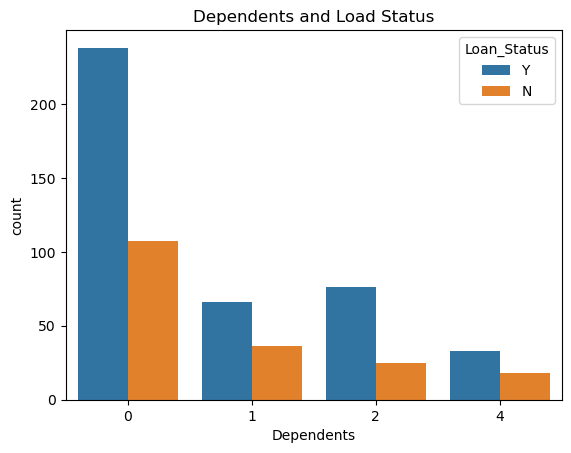

In [128]:
sns.countplot(x=df["Dependents"], hue=df["Loan_Status"])
plt.title("Dependents and Load Status")

Text(0.5, 1.0, 'Education and Loan Status')

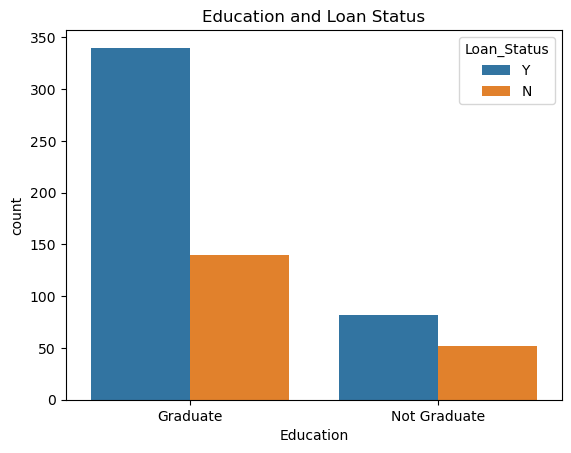

In [129]:
sns.countplot(x=df["Education"], hue= df["Loan_Status"])
plt.title("Education and Loan Status")

In [130]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Text(0.5, 1.0, 'Self Employed and Loan Status')

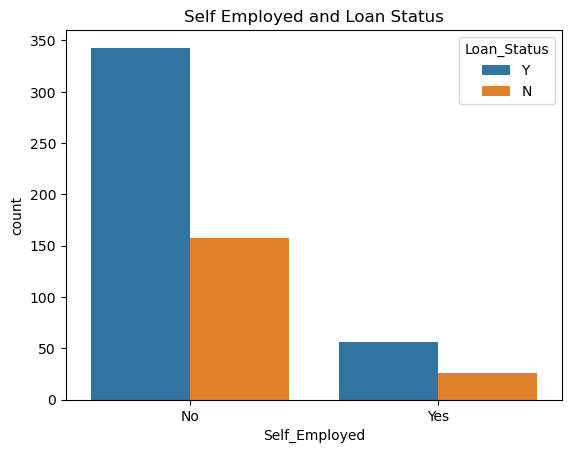

In [131]:
sns.countplot(x=df["Self_Employed"], hue=df["Loan_Status"])
plt.title("Self Employed and Loan Status")

Text(0.5, 1.0, 'Marital and Loan Status')

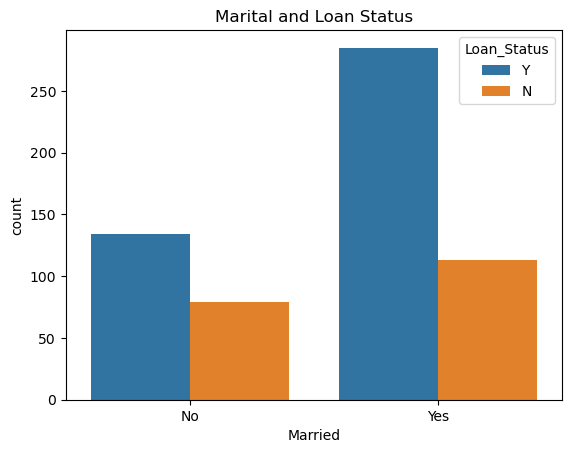

In [132]:
sns.countplot(x=df["Married"], hue=df["Loan_Status"])
plt.title("Marital and Loan Status")

## Splitting of the Data

In [133]:
target= 'Loan_Status'
x=df.drop(columns=[target])
y=df[target]
print(f"X Shape {x.shape}")
print(f"Y shape {y.shape}")
      

X Shape (614, 11)
Y shape (614,)


In [134]:
x_test, x_train, y_test, y_train= train_test_split(x,y,test_size=0.2, random_state=42)

In [136]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_train.shape)
print("y_test shape:",y_train.shape)

#Here the x_test shape should be (491,11)
#And the y_test shape should be (491,)

x_train shape: (123, 11)
y_train shape: (123,)
x_test shape: (123, 11)
y_test shape: (123,)


## Baseline 

In [138]:
acc_baseline=df['Loan_Status'].value_counts(normalize=True).max()
print(f"Baseline Accuracy is {acc_baseline}")

Baseline Accuracy is 0.6872964169381107


In [143]:
def train(model,model_name):
    model.fit(x_train,y_train)
    print(f'training accuracy of {model_name} is: {model.score(x_test,y_test)}')
    print(f'testing accuracy of {model_name} is: {model.score(x_test,y_test)}')
    
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(svm_model,x_test,y_test)
    
def class_report(model):
    print(classification_report(y_test, model.predict(x_test)))

## SVM

In [145]:
#Build model

svm_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    SVC(kernel='linear')
)

In [146]:
train(svm_model, "SVC")

training accuracy of SVC is: 0.814663951120163
testing accuracy of SVC is: 0.814663951120163


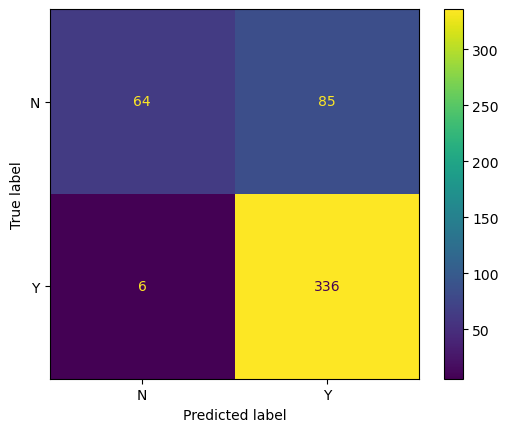

In [147]:
conf_matrix(svm_model)

In [148]:
class_report(svm_model)

              precision    recall  f1-score   support

           N       0.91      0.43      0.58       149
           Y       0.80      0.98      0.88       342

    accuracy                           0.81       491
   macro avg       0.86      0.71      0.73       491
weighted avg       0.83      0.81      0.79       491



## Logistic Regression 

In [149]:
#Build Model
Logistic_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    LogisticRegression()
)

In [151]:
train(Logistic_model, "LogisticRegression")

training accuracy of LogisticRegression is: 0.8207739307535642
testing accuracy of LogisticRegression is: 0.8207739307535642


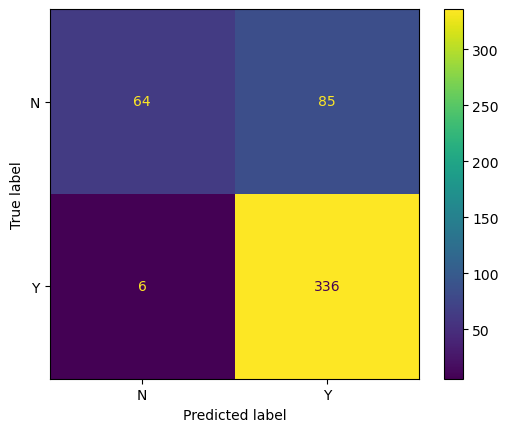

In [159]:

conf_matrix(Logistic_model)

In [154]:
class_report(Logistic_model)

              precision    recall  f1-score   support

           N       0.92      0.45      0.60       149
           Y       0.80      0.98      0.88       342

    accuracy                           0.82       491
   macro avg       0.86      0.72      0.74       491
weighted avg       0.84      0.82      0.80       491



## Communicate 

In [155]:
features= x_test.columns
importances = Logistic_model.named_steps['logisticregression'].coef_[0]

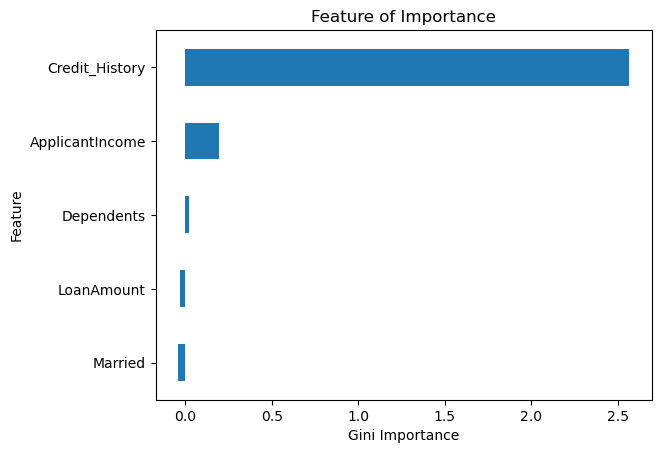

In [156]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail().plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature of Importance");